In [2]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import trompy as tp

In [3]:
animal="VGP302"
day="031"
date="20221110"


s2p_folder = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\VGP_procd_data_22-12-05\\sub-{}\\ses-{}".format(animal, day)
events_file = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\behav\\sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv".format(animal, day, date)


raw_F = np.load(os.path.join(s2p_folder, 'F.npy'))
neu_F = np.load(os.path.join(s2p_folder, 'Fneu.npy'))
iscell = np.load(os.path.join(s2p_folder, 'iscell.npy'))
stats=np.load(os.path.join(s2p_folder, 'stat.npy'), allow_pickle=True)


print(events_file)

C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\Processed\behav\sub-VGP302\ses-031-20221110\sub-VGP302_ses-031_events.csv


In [3]:
stats[24]['med']

[175, 389]

In [4]:
neu_F.shape

(108, 11518)

In [45]:
cell_idx = 23

r = raw_F[cell_idx, :]
x = raw_F[cell_idx, :] - neu_F[cell_idx, :]
x7 = raw_F[cell_idx, :] - 0.7 * neu_F[cell_idx, :]
print('len X:',len(x))

#zscore

z = (r - np.mean(r))/np.std(r)

#df/f
df = r-np.mean(r)

#filter
t = np.arange(0,len(x)/10,0.1)
filt = signal.butter(4, 1, 'low', fs=10, output='sos')
filtered = signal.sosfilt(filt, z)

len X: 11518


(500.0, 700.0)

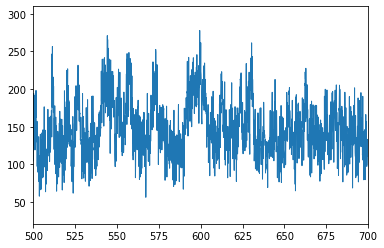

In [46]:
f, ax = plt.subplots()
ax.plot(t, x, linewidth=1)
# ax.plot(t, filtered, linewidth=1)
#ax.set_ylim(16800, 17000)

ax.set_xlim([500, 700])

In [47]:
np.shape(raw_F)

(108, 11518)

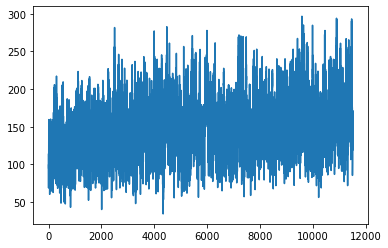

In [48]:
n = neu_F[cell_idx, :]
plt.plot(x)

In [49]:
import pandas as pd

df = pd.read_csv(events_file)

pump_frames = list(df[df['Item1'] == 'pump_on']['Item2.Item2'])

licks_frames = list (df[df['Item1']== 'Lick']['Item2.Item2'])


In [50]:
df

,Item1,Item2.Item1.Item1,Item2.Item1.Item2.Value.IsInvalid,Item2.Item1.Item2.Value.ElementType,Item2.Item1.Item2.Value.Size.Width,Item2.Item1.Item2.Value.Size.Height,Item2.Item1.Item2.Value.Rows,Item2.Item1.Item2.Value.Cols,Item2.Item1.Item2.Value.Step,Item2.Item1.Item2.Value.Depth,Item2.Item1.Item2.Value.Channels,Item2.Item1.Item2.Value.ElementSize,Item2.Item1.Item2.Value.Data,Item2.Item1.Item2.Value.IsClosed,Item2.Item1.Item2.Timestamp,Item2.Item2
0,Cue_on,True,False,6,10,2,2,10,80,F64,1,8,546234160,False,2022-11-08T13:55:55.9387008+01:00,120
1,Cue_off,True,False,6,10,2,2,10,80,F64,1,8,601040672,False,2022-11-08T13:56:00.9423872+01:00,170
2,pump_on,True,False,6,10,2,2,10,80,F64,1,8,546248496,False,2022-11-08T13:56:01.4408704+01:00,175
3,Lick,True,False,6,10,2,2,10,80,F64,1,8,518684240,False,2022-11-08T13:56:03.4319360+01:00,195
4,pump_off,True,False,6,10,2,2,10,80,F64,1,8,518677968,False,2022-11-08T13:56:03.5418880+01:00,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,pump_off,True,False,6,10,2,2,10,80,F64,1,8,546236848,False,2022-11-08T14:14:05.0975744+01:00,11008
280,Cue_on,True,False,6,10,2,2,10,80,F64,1,8,604698752,False,2022-11-08T14:14:34.8152448+01:00,11305
281,Cue_off,True,False,6,10,2,2,10,80,F64,1,8,603698608,False,2022-11-08T14:14:39.9087232+01:00,11356
282,pump_on,True,False,6,10,2,2,10,80,F64,1,8,603581776,False,2022-11-08T14:14:40.4215936+01:00,11361


In [51]:
snips = []
for p in pump_frames:
    snips.append(filtered[p-50:p+100]) 

In [52]:
# excluding missed trials 
# List of hit and missed trieals

hit=[]
miss=[]
for p in pump_frames: 
    temp=[]
    for lick in licks_frames: 
        if lick > p and lick < p + 100:
            temp.append(lick)
    if len(temp) > 0: 
        hit.append(p)
    if len(temp) == 0: 
        miss.append(p)
        
print('hit', hit)
print('miss', miss)


hit [175, 432, 1620, 1931, 2799, 4464, 5173, 5512, 7060, 9882, 10488, 10755]
miss [751, 1040, 1385, 2272, 2531, 3057, 3414, 3659, 3960, 4209, 4702, 4945, 5879, 6236, 6579, 6823, 7427, 7751, 8056, 8342, 8703, 9055, 9311, 9545, 10221, 10988, 11361]


In [53]:
#snips in hit and missed trials 

snips_hit=[]
for p in hit: 
    snips_hit.append(filtered[p-50:p+100])
    
    
snips_miss=[]
for p in miss: 
    snips_miss.append(filtered[p-50:p+100])
    
    
print(len(snips_hit))
print(len(snips_miss))

12
27


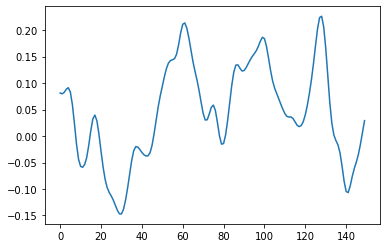

In [54]:
#all tirals

plt.plot(np.mean(snips, axis=0))


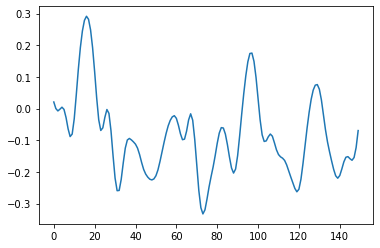

In [55]:
# hit trials

plt.plot(np.mean(snips_hit, axis=0))

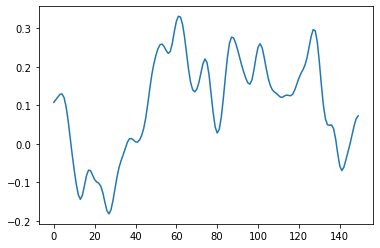

In [56]:
# missed trials
plt.plot(np.mean(snips_miss, axis=0))

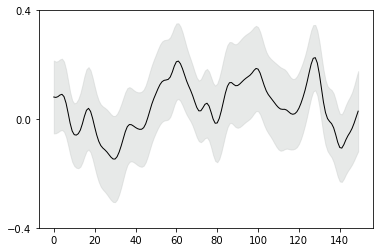

In [57]:
#all trials
f, ax = plt.subplots()
tp.shadedError(ax, snips)
ax.set_yticks([-0.4, 0,  0.4])
# f.savefig('PR_all_malt.pdf')

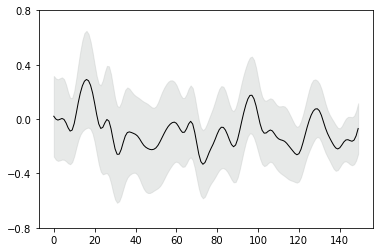

In [58]:
# hit trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_hit)
ax.set_yticks([-0.8, -0.4, 0,  0.4, 0.8])
# f.savefig('PR_hit_malt.pdf')

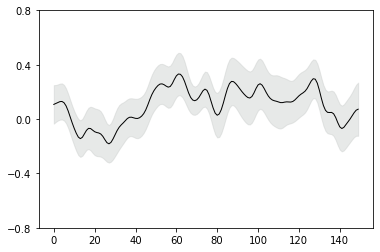

In [59]:
# miss trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_miss)

ax.set_yticks([-0.8, -0.4, 0,  0.4, 0.8])

# f.savefig('PR_miss_malt.pdf')

In [60]:
# tp.makeheatmap?

In [61]:
cell_idx = [idx for idx,vals in enumerate(iscell) if vals[0]==1]

In [62]:
len(cell_idx)

48

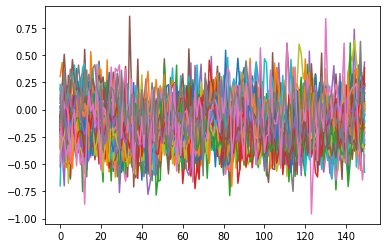

In [63]:
def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    # x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p)
        if len(temp) == 0: 
            miss.append(p)
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    ax.plot(avg_h)
    avg_pump[i,:] = avg
    


In [64]:
def make_heatmap(data, events=None, ax=None, cmap="jet", sort=True, ylabel="Trials"):

    if ax == None:
        f, ax = plt.subplots()

    (ntrials, bins) = np.shape(data)
    
    print(ntrials, bins)
    

    xvals = np.linspace(-5,10,bins)
    yvals = np.arange(0, ntrials)
    xx, yy = np.meshgrid(xvals, yvals)

#     if sort == True:
#         try:
#             inds = np.argsort(events)
#             data = [data[i] for i in inds]
#             events = [events[i] for i in inds]
#         except:
#             print("Events cannot be sorted")

    mesh = ax.pcolormesh(xx, yy, data, cmap=cmap, shading="auto")

#     if events:
#         ax.vlines(events, yvals-0.5, yvals+0.5, color='w')

#     ax.set_ylabel(ylabel, rotation=90, labelpad=2)

#     ax.invert_yaxis()
#     ax.set_yticks([])
#     ax.set_xticks([])
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

    return ax, mesh

48 150


(<AxesSubplot:>, <matplotlib.collections.QuadMesh at 0x22a74c68ac0>)

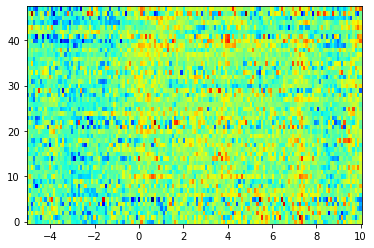

In [65]:
f, ax = plt.subplots()
make_heatmap(avg_pump, ax=ax)

In [26]:
avg_pump

array([[ 0.06157142,  0.09694166, -0.02091219, ...,  0.00407578,
         0.1033856 ,  0.09555852],
       [-0.17542204,  0.04887342,  0.02451048, ..., -0.2038181 ,
        -0.04012665,  0.07730635],
       [ 0.07872939, -0.02407084,  0.14922822, ..., -0.0014895 ,
         0.03548902, -0.00776162],
       ...,
       [-0.05758179, -0.02068071,  0.1073432 , ..., -0.03826713,
         0.08354328,  0.00345036],
       [-0.01815016,  0.08568348,  0.45223695, ..., -0.19377846,
        -0.30114159, -0.01434041],
       [-0.12957947, -0.20192589, -0.10622538, ...,  0.26388061,
         0.18089816,  0.28228393]])

In [27]:
dir(tp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ax2prop',
 'barscatter',
 'bonferroni_corrected_ttest',
 'burstlengthFig',
 'burstprobFig',
 'calculate_burst_prob',
 'checknsessions',
 'discrete2continuous',
 'download_data',
 'event2sample',
 'fig_utils',
 'find_overlap',
 'findnoise',
 'findpercentilevalue',
 'fit_weibull',
 'flatten_list',
 'general_utils',
 'get_violinstats',
 'getuserhome',
 'ibiFig',
 'iliFig',
 'invisible_axes',
 'isnumeric',
 'lickCalc',
 'lick_figs',
 'lick_utils',
 'licklengthFig',
 'lighten_color',
 'logical_subset',
 'makeheatmap',
 'makerandomevents',
 'mastersnipper',
 'mean_and_sem',
 'med_abs_dev',
 'medfilereader',
 'medfilereader_licks',
 'merge_fed_files',
 'merge_files',
 'metafile_utils',
 'metafilemaker',
 'metafilereader',
 'nanroc',
 'parse_args',
 'plot_ROC_and_line',
 'processdata',
 'random_array',
 'remcheck',
 'removenoise',
 'removeshortbursts',
 'resample_sni